## Часть 1. Свойства ДВПФ

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sympy.functions.elementary.exponential import exp
from sympy import I, Abs
import sympy as sym

#### Функция DTFT_abs(x, M)


In [2]:
def DTFT_abs(x, M):
    return (-0.5+(np.arange(M)/M), 
            abs(np.fft.fftshift(np.fft.fft(x, M))))

\begin{equation} 
X(\nu)=\sum_{k=-\infty}^{\infty}x(k)e^{-j2\pi\nu k},
\end{equation}

\begin{equation}
x(k)=\int_{-1/2}^{1/2}X(\nu)e^{j2\pi\nu k}d\nu.
\end{equation}

Вычисление модуля ДВПФ для последовательности отсчетов $x(k)$ конечной длины в $M$ точках при $\nu \in [-0.5; 0.5]$.

In [3]:
def plot_dtft(f, Xn):
    plt.plot(f, Xn, 'g'); 
    plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
    plt.xticks(np.arange(-0.5, 0.6, 0.1))
    plt.title(u'DTFT of $x(k)$')
    plt.xlabel(u'$\\nu$')
    plt.ylabel(u'$|X(\\nu)|$')
    plt.grid()

#### График для сигнала


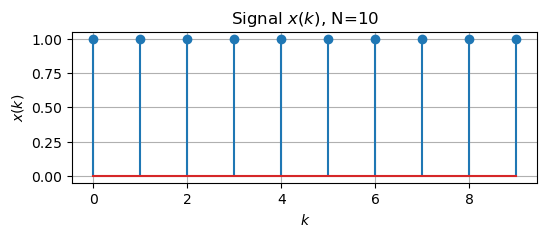

In [4]:
N = 10
x = np.ones(N)
k = np.arange(N)
plt.figure(figsize=[6, 2], dpi=100)
plt.stem(k, x, use_line_collection=True)
plt.title(u'Signal $x(k)$, N=%i' %N);
plt.xlabel(u'$k$');
plt.ylabel(u'$x(k)$');
plt.grid()

#### График модуля ДВПФ


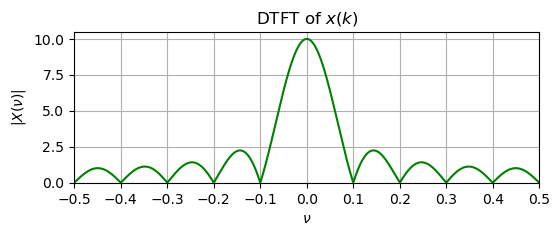

In [5]:
plt.figure(figsize=[6, 2], dpi=100)
M=1024;
f, Xn = DTFT_abs(x, M)
plot_dtft(f, Xn)

### Задание

#### №1
Получите с помощью моделирования в Octave/Python ДВПФ спектр единичного импульса $\mathbf1(k)$ для нормированных частот $\nu \in [-0,5; \;0,5]$. Сравните результат со свойством
\begin{equation} \label{oneEq}
\mathbf1(k)\leftrightarrow1
\end{equation}

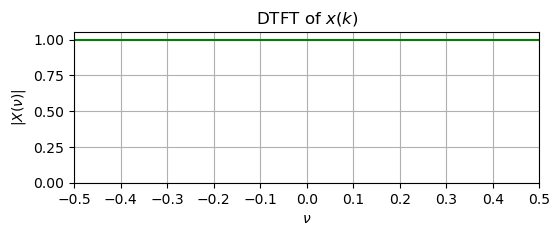

In [6]:

def print_plot(x):
    plt.figure(figsize=[6, 2], dpi=100)
    M=1024;
    f, Xn = DTFT_abs(x, M)
    plot_dtft(f, Xn)
    return

N = 1
x = np.ones(N)
k = np.ones(x.size)
print_plot(x)

\begin{equation} 
X(\nu) = |e^{-j2\pi\nu}| = 1 
\end{equation}

#### №2
Используя моделирование в Octave/Python, получите ДВПФ спектр двух последовательных единичных импульсов $x_2(k)=\mathbf1(k)+\mathbf1(k-1)$ для $\nu \in [-0,5; \;0,5]$.

Применяя теорему запаздывания и свойство линейности, получите аналитическое выражение для ДВПФ спектра $X_2(\nu)$ последовательности $x_2(k)$. Сравните результаты.

Зная аналитическую запись $X_2(\nu)$, вычислите значение интеграла $\int_{-1/2}^{1/2}\left|X_2(\nu)\right|^2d\nu$. Сравните результат с тем, который получается путем применения равенства Парсеваля.

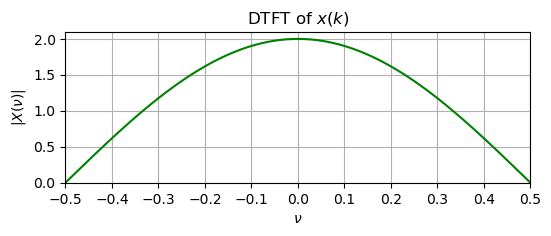

In [7]:
N = 2
x = np.ones(N)
k = np.ones(x.size)
print_plot(x)

\begin{equation} 
x(k-l) => X(\nu)e^{-j2\pi\nu k l}
\end{equation}

\begin{equation} 
X_2(\nu) = 1 + e^{j2\pi\nu}
\end{equation}

\begin{equation} 
|X_2(\nu)| = |1 + e^{j2\pi\nu}| = 2cos{2\pi\nu}
\end{equation}

#### №3
Вычислите и постройте в Octave/Python  ДВПФ спектр  $X_N(\nu)$ N последовательных единичных импульсов $x_N(k)=\sum_{m=0}^{N-1} \mathbf1(k-m)$ для $\nu \in [-0,5; \;0,5]$.

Получите аналитическую запись $X_N(\nu)$ с использованием теоремы запаздывания (воспользоваться формулой геометрической прогрессии для суммы комплексных экспонент). Сравните результат с непосредственным вычислением ДВПФ спектра в Octave/Python.

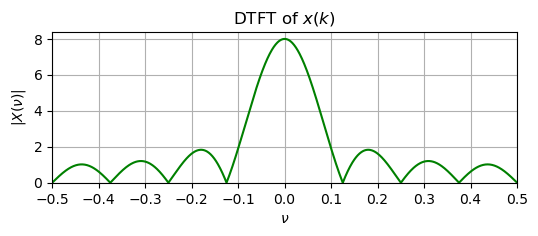

In [8]:
N = 8
x = np.ones(N)
k=np.arange(x.size)
print_plot(x)

\begin{equation} 
X(\nu) = \sum_{k=0}^{N-1}e^{-j2\pi\nu k} = \frac{1 - e^{-j2\pi\nu N}}{1 - e^{-j2\pi\nu}}
\end{equation}

\begin{equation} 
|X(\nu)| = \frac{sin{N\pi\nu}}{sin{\pi\nu}}
\end{equation}

#### №4
Рассмотрите последовательность $y(k)=kx_N(k)$. Найдите, используя Octave/Python, ее ДВПФ спектр  $Y(\nu)$ для $\nu \in [-0,5; \;0,5]$.

Сравните результат с  аналитической записью $Y(\nu)$  (дифференцирование  $X_N(\nu)$ по частоте, свойство
\begin{equation} \label{difEq}
kx(k)\leftrightarrow \frac{j}{2\pi} \frac{dX(\nu)}{d\nu}.
\end{equation}

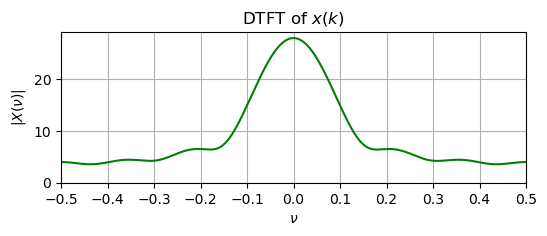

In [9]:
N = 8
x = np.arange(N)

print_plot(x)

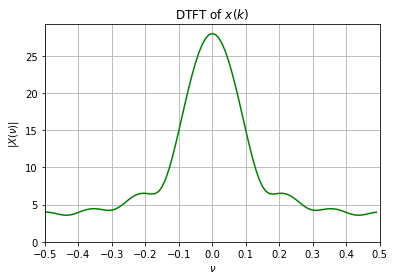

In [10]:
v = sym.Symbol('v')
init_spectrum = sym.sin(N * sym.pi * v) / sym.sin(sym.pi * v)
init_spectrum *= exp(sym.pi * I * (N - 1) * v)
abs_derivative = sym.Abs(sym.diff(I / (2 * sym.pi) * init_spectrum))
f = np.arange(-0.5, 0.5, 0.01)
Xn = [abs_derivative.evalf(subs={v:x}) for x in f]

plot_dtft(f, Xn)

#### №5
Рассмотрите последовательность $z(k)$, получаемую добавлением между каждой парой отсчетов последовательности  $x_N(k)$ $L-1$ нулей:
$$
\sum_{m=-\infty}^{\infty} x_N(m)\mathbf1(k - mL).
$$
Постройте ее ДВПФ спектр в Octave/Python для $\nu \in [-0,5; \;0,5]$ и сравните результат с $X_N(\nu L)$ (свойство
$
\sum_{m=-\infty}^{\infty} x(m) \mathbf1 (k-mL) \leftrightarrow X(\nu L) $)


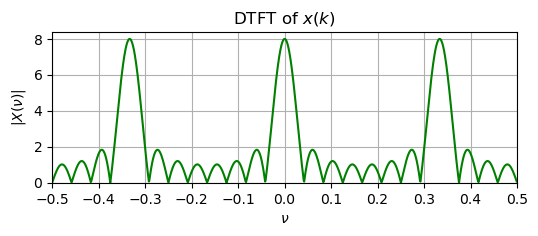

In [11]:
N = 8
L = 2
x = np.array(([1] + [0]*L)*(N-1)+[1])

print_plot(x)

\begin{equation} 
|X(\nu L)| = |\frac{sin{N\pi\nu L}}{sin{\pi\nu L}}|
\end{equation}

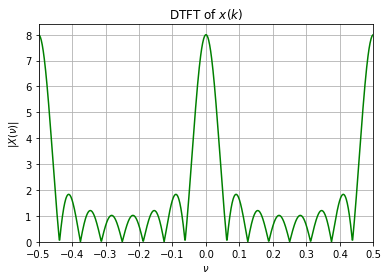

In [12]:
N = 8
L = 2
Xn = np.arange(-0.5, 0.5, 0.001)
f = np.abs(np.sin(N * np.pi * Xn * L) / np.sin(np.pi * Xn * L))
plot_dtft(Xn, f)

#### №6

Постройте в Octave/Python для $\nu \in [-0,5; \;0,5]$ ДВПФ спектр $Q(\nu)$ последовательности $q(k)=x_N(k)\exp(j2\pi\nu_0 k)$ для $\nu_0$. Чем отличаются $Q(\nu)$ и $X_N(\nu)$? Как это согласуется с теоремой смещения? 

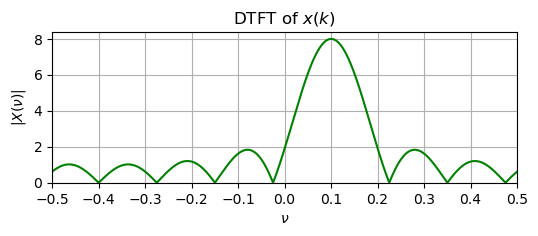

In [13]:
N = 8
nu_0 = 1. / 10
x = np.arange(N)
x = np.exp(1j*2*np.pi*nu_0*x)

print_plot(x)

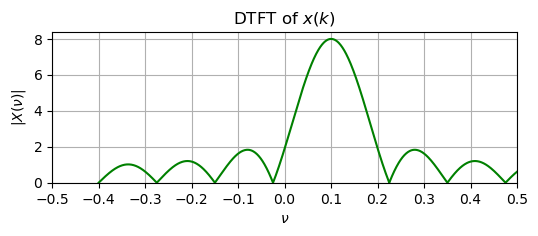

In [14]:
N = 8
nu_0 = 1./ 10
x = np.ones(N)

plt.figure(figsize=[6, 2], dpi=100)
M=1024;
f, Xn = DTFT_abs(x, M)

plot_dtft(f + nu_0, Xn)

### Контрольные вопросы
#### 1.
Пусть $X(\nu)$ -- ДВПФ спектр некоторой последовательности $x(k)$. Как нужно изменить последовательность $x(k)$, чтобы ее ДВПФ спектр был сдвинут влево относительно исходного на $\nu_0=1/10$?

#### 2.
Пусть $X_5(\nu)$ -- ДВПФ спектр  пяти последовательных единичных импульсов $x_5(k)=\sum_{m=0}^{4} \mathbf1(k-m)$, а $Y(\nu)$ -- ДВПФ спектр  последовательности $y(k)=kx_5(k)$. 
Пусть также
$$\Phi(\nu)=\int_{-1/2}^{1/2}X_5(\widetilde\nu)Y(\nu-\widetilde\nu)d\widetilde\nu,$$
$$ \Psi(\nu)=\int_{-1/2}^{1/2}Y(\widetilde\nu)X_5(\nu-\widetilde\nu)d\widetilde\nu. $$
Чему равно $\Phi(\nu)$? Выполняется ли $\Phi(\nu)\equiv\Psi(\nu)?$

#### 3.
Предположим, что имеется финитная последовательность 
$$x(k)=\{1;\;5;\;\underbrace{2}_{k=0};\;4;\;1;\;1;\;3\}.$$
Не вычисляя непосредственно ее ДВПФ $X(\nu)$, опередите значения следующих выражений:

* $X(0)$;
* $X(1/2)$;
* $\int_{-1/2}^{1/2}X(\nu)d\nu$;
* $\int_{-1/2}^{1/2}\left|X(\nu)\right|^2d\nu$;
* $\int_{-1/2}^{1/2}\left|\frac{dX(\nu)}{d\nu}\right|^2d\nu$.

#### 4.
Докажите равенство Парсеваля для ДВПФ. 

#### 5.
Докажите для ДВПФ свойство:

если
$
x(k)\leftrightarrow X(\nu), то 
$
$
kx(k)\leftrightarrow \dfrac{j}{2\pi} \dfrac{dX(\nu)}{d\nu}.
$

Получите аналогичное свойство для спектра сигнала (последовательности) $k^M x(k)$, где M - натуральное число.  

#### 6. 
Предположим, что аналоговый сигнал $x(t)=\cos(2\pi t f_0)$, $-\infty<t<\infty$,  $f_0=250$ Гц был дискретизован с частотой дискретизации $f_d=1$ кГц. Будет ли наблюдаться эффект наложения (aliasing)?

Определить и построить график ДВПФ для отсчетов сигнала $x(t)$ в переменных $f$ и $\nu$:

$$X(f)=\Delta t \sum_{k=-\infty}^{\infty} x(k\Delta t) \exp(-j2\pi f k \Delta t),$$

$$X(\nu)=\Delta t \sum_{k=-\infty}^{\infty} x(k\Delta t) \exp(-j2\pi \nu k ).$$

#### 7.
Построить графики ДВПФ сигналов (последовательностей) $x_1(k)=\cos(2\pi k \nu_0)$ и $x_2(k)=\sin(2\pi k \nu_0)$, $\nu_0=0.2$, $-\infty<k<\infty$

Определить ДВПФ для последовательностей $y_1(k)$ и $y_2(k)$ взвешанных прямоугольной оконной функцией $w(k)=\sum_{m=0}^{N-1} \mathbf1(k-m)$, т.е. $y_1(k)=x_1(k)w(k)$ и $y_2(k)=x_2(k)w(k)$ (это можно сделать, зная ДВПФ окна и используя теорему смещения).